In [1]:
import matplotlib.pyplot as plt
import psycopg
import numpy as np
import pandas as pd

**NOTE**  
Set the credentials in the cell below before executing the notebook any further.

In [ ]:
CONFIG_MULTISOLVENT = None

def SetLoginInfoAndConfigMultisolvent():
    global CONFIG_MULTISOLVENT
    CONFIG_MULTISOLVENT = {}
    CONFIG_MULTISOLVENT['dbtype'] ='postgresql'
    CONFIG_MULTISOLVENT['host'] = 'ADD HOSTNAME'
    CONFIG_MULTISOLVENT['username'] = 'ADD USERNAME'
    CONFIG_MULTISOLVENT['dbname'] = 'ADD DBNAME'

SetLoginInfoAndConfigMultisolvent()

In [7]:
cn = psycopg.connect(dbname=CONFIG_MULTISOLVENT['dbname'], user=CONFIG_MULTISOLVENT['username'], host=CONFIG_MULTISOLVENT['host'])
curs = cn.cursor()
sql = "select entrynr, wasserstein2norm, omeganorm, tau from comparisons.metrics where comparisonid=1 and na>50 and nb>50;"
curs.execute(sql)
metrics = curs.fetchall()
dat = pd.DataFrame(metrics, columns=['entrynr', 'wasserstein2norm', 'omeganorm', 'tau'])

Text(0.5, 0, '$W_2$ (crystal vs vac), normalized')

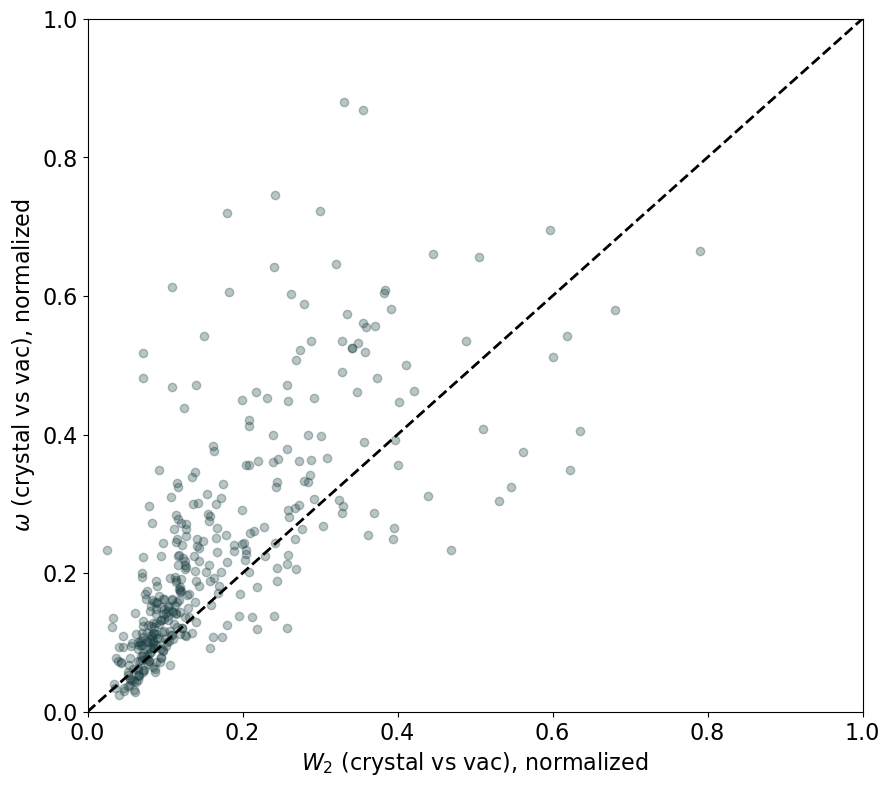

In [11]:
fig, ax = plt.subplots(figsize=(10, 9))
ax.scatter(dat['wasserstein2norm'],dat['omeganorm'], color="#193D40",alpha=0.3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=2)
ax.tick_params(axis='both', labelsize=16)
ax.set_ylabel(r'$\omega$ (crystal vs vac), normalized',fontsize=16)
ax.set_xlabel(r'$W_2$ (crystal vs vac), normalized',fontsize=16)